In [22]:
from openket import *
from scipy.integrate import odeint
from sympy import var, I
import numpy as np
import matplotlib.pyplot as plt

In [35]:
h = 1
rabi = 1/2 #dab*E0/h #frecuencia de Rabi
delta = 0 #detuning

base = [Ket(0), Ket(1)]
nmax = len(base)
dt = 1000
t = np.linspace(0,10,dt)

In [37]:
rho = Operator("rho")

H = h/2 * (-delta*Ket(0)*Bra(0) + -rabi*Ket(0)*Bra(1) + -rabi*Ket(1)*Bra(0) + delta*Ket(1)*Bra(1))
rdot = -(I/h)*comm(H, rho)

y0 = [1,0, 0,0, 0,0, 0,0]
rho = build_ode(rho=rho, rdot=rdot, basis=base, y0=y0, t=t, filetype=None)
rho_complex = rho[:, ::2] + 1j * rho[:, 1::2]
rho_complex = rho_complex.reshape(dt, nmax, nmax)
rho_nn = np.diagonal(rho_complex, axis1=1, axis2=2)

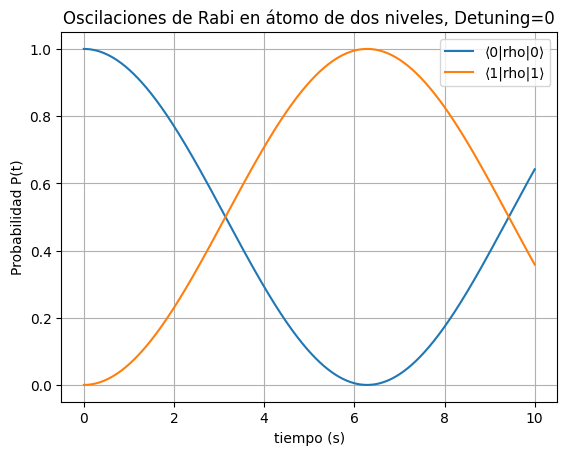

In [38]:
plt.plot(t, rho_nn[:,0], label="⟨0|rho|0⟩")
plt.plot(t, rho_nn[:,1], label="⟨1|rho|1⟩")
plt.xlabel('tiempo (s)')
plt.ylabel('Probabilidad P(t)')
plt.legend()
plt.title('Oscilaciones de Rabi en átomo de dos niveles, Detuning='+str(delta))
plt.grid(True)
plt.show()